# SVI minibatch variation on the Sparse ZI pCMF test

In [1]:
from pCMF.misc import utils, plot_utils
from pCMF.models.pcmf.inferences import cavi_new, svi_new
from pCMF.models.pcmf import pcmf

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

import operator
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# Experiment parameters
N = 100 # number of observations
P = 20 # observation space dimensionality
K = 10 # latent space dimensionality
C = 2 # number of clusters

# Generate data set
z_p = 0.5
eps = 5.
Y, D, X, R, V, U, clusters = utils.generate_sparse_data(N, P, K, C=C, zero_prob=z_p, noisy_prop=0.5,
                                                 eps_U=eps, return_all=True)

Y_train, Y_test, X_train, X_test, D_train, D_test, U_train, U_test, c_train, c_test = train_test_split(Y, X, D, U.T, clusters, test_size=0.2, random_state=42)

In [3]:
T = 60. * 60. * 1.
S = 30.
max_iter = 4

In [4]:
model1 = pcmf.PCMF(Y_train, c_train, D_train=D_train, n_components=K)
model2 = pcmf.PCMF(Y_train, c_train, D_train=D_train, n_components=K, minibatch_size=1)
model3 = pcmf.PCMF(Y_train, c_train, D_train=D_train, n_components=K, minibatch_size=2)
model4 = pcmf.PCMF(Y_train, c_train, D_train=D_train, n_components=K, minibatch_size=3)

model_list = [model1, model2, model3, model4]

CAVI-EB:
Considering zero-inflated counts.
Considering loading sparsity.
SVI-EB-1:
Considering zero-inflated counts.
Considering loading sparsity.
SVI-EB-2:
Considering zero-inflated counts.
Considering loading sparsity.
SVI-EB-3:
Considering zero-inflated counts.
Considering loading sparsity.


In [5]:
for model in model_list:
    model.run(max_iter=max_iter, max_time=T, sampling_rate=S, verbose=True)

Running CAVI-EB...
Iteration 3/4. Log-likelihood: 164.595. Elapsed: 0h0m1s
Running SVI-EB-1...
Iteration 3/4. Log-likelihood: 57.715. Elapsed: 0h0m0s
Running SVI-EB-2...
Iteration 3/4. Log-likelihood: 120.699. Elapsed: 0h0m0s
Running SVI-EB-3...
Iteration 3/4. Log-likelihood: 125.976. Elapsed: 0h0m0s


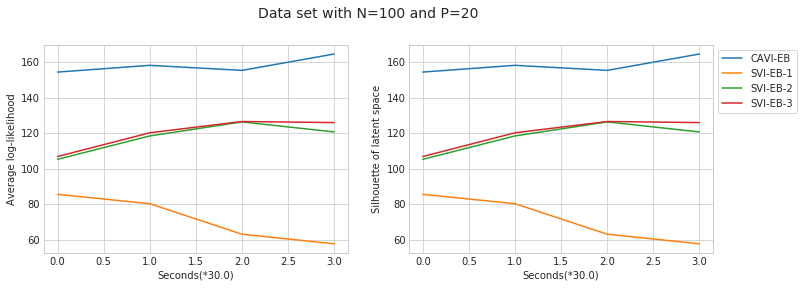

In [6]:
fig = plt.figure(figsize=(12, 4))

ax = plt.subplot(1, 2, 1)
plot_utils.plot_model_convergence(model_list, ax=ax, 
                                   ylabel='Average log-likelihood', xlabel='Seconds(*{0})'.format(S))

ax = plt.subplot(1, 2, 2)
plot_utils.plot_model_convergence(model_list, ax=ax, 
                                   ylabel='Silhouette of latent space', xlabel='Seconds(*{0})'.format(S))

plt.legend(loc='upper left', bbox_to_anchor=[1., 1.], frameon=True)
plt.suptitle('Data set with N={} and P={}'.format(N, P), fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()

In [ ]:
for model in model_list:
    